In [1]:
import numpy as np

### Задачи 1-6 (13 баллов).

Для каждой из задач ниже приведите 2 реализации: одна без использования numpy, а вторая полностью векторизованная (**без использования циклов/map/list comprehension**).

* __Задача 1__: Посчитать  сумму неотрицательных элементов на диагонали прямоугольной матрицы X. Если неотрицательных элементов на диагонали нет, то вернуть -1.

  **Пример:**
  
      Input: X = np.array([[-1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
      Output: 3


* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.

   **Пример:**
      Input: x = [1, 2, 2, 4], y = [4, 2, 1, 2]
      Output: True
  

* __Задача 3__: Найти максимальное прозведение соседних элементов в массиве x, таких что хотя бы один множитель в произведении делится на 3. Если таких произведений нет, то вернуть -1.

  **Пример**
  
      Input: x = [6, 2, 0, 3, 0, 0, 5, 7, 0]
      Output: 12


* __Задача 4__: Дан трёхмерный массив image, содержащий изображение, размера (height, width, num_channels), а также вектор весов weights длины num_channels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). ***Обратите внимание, что в изображении может быть не три канала!***

  **Пример:**
  
      Input: image = [[[1, 1, 1], [2, 2, 2], [3, 3, 3]], [[4, 4, 4], [5, 5, 5], [6, 6, 6]], [[7, 7, 7], [8, 8, 8], [9, 9, 9]]], weights= [1, 2, 3]
      Output: [[6, 12, 18], [24, 30, 36], [42, 48, 54]]

  **Комментарий**:
  - В примере исходное изображение с тремя каналами, где по всем каналам значения равны [[1, 2, 3], [4, 5, 6], [7, 8, 9]].
  - После умножения первого канала на вес 1 получим значения для первого канала [[1, 2, 3], [4, 5, 6], [7, 8, 9]].
  - После умножения второго канала на вес 2 получим значения для второго канала [[2, 4, 6], [8, 10, 12], [14, 16, 18]].
  - После умножения третьего канала на вес 3 получим значения для третьего канала [[3, 6, 9], [12, 15, 18], [21, 24, 27]].
  - Если сложить полученное изображение поканально получим [[6, 12, 18], [24, 30, 36], [42, 48, 54]].



* __Задача 5__: Найти скалярное произведение между векторами x и y, заданными в формате RLE (Run-length encoding, кодирование длин серий). Каждый закодированный вектор представлен двумерным массивом, каждая строка которого имеет размерность 2, где первое число - элемент, а второе число - сколько раз элемент нужно повторить. Например, [[1,2], [2, 3], [3, 1]] соответствует веткору [1, 1, 2, 2, 2, 3]. В случае несовпадения длин исходных векторов вернуть -1.

  **Пример:**
  
      Input: x = [[1, 2], [2, 3], [3, 1]], y = [[1, 1], [0, 5]].
      Output: 1

### Задача 6.

*  Для каждой задачи сравните скорость работы невекторизованной и векторизованной реализации. Код генерации данных разных размеров и функция для замера времени работы функций уже написаны.
*  Сделайте выводы о времени работы функций.

In [10]:
import time
import numpy as np

import functions_vectorised
import functions

In [3]:
data_1 = []
for n in [10, 100, 1000, 10000]:
    x = np.random.randint(0, 3, (n, n))
    data_1 += [x]

data_2 = []
for n in [10, 100, 1000, 10000]:
    x = np.random.randint(0, 2, n)
    y = np.random.randint(0, 2, n)
    data_2 += [(x, y)]

data_3 = []
for n in [10, 100, 1000, 10000]:
    x = np.random.randint(1, 100, n)
    data_3 += [x]

data_4 = []
for n in [10, 100, 1000]:
    image = np.random.random((n, n, 10))
    weights = np.random.random(10)
    data_4 += [(image, weights)]

data_5 = []
for n in [10, 100, 1000, 10000]:
    x = np.random.randint(1, 3, (n, 2))
    y = np.random.randint(1, 3, (n, 2))
    shapes = np.random.randint(1, 3, n)
    x[:, 1] = shapes
    y[:, 1] = shapes
    data_5 += [(x, y)]


In [4]:
def count_time(func, *data):
    tick = time.perf_counter()
    func(*data)
    return time.perf_counter() - tick

In [21]:
times = {'func': [], 'performance': [], 'type': ['default', 'vectorised'] * 5}

funcs = {'default_1': functions.default_1,
         'default_2': functions.default_2,
         'default_3': functions.default_3,
         'default_4': functions.default_4,
         'default_5': functions.default_5,
         'vectorised_1': functions_vectorised.vectorised_1,
         'vectorised_2': functions_vectorised.vectorised_2,
         'vectorised_3': functions_vectorised.vectorised_3,
         'vectorised_4': functions_vectorised.vectorised_4,
         'vectorised_5': functions_vectorised.vectorised_5}

criteria = ['ints',
            'tuples',
            'ints',
            'tuples',
            'tuples']

data = [data_1,
        data_2,
        data_3,
        data_4,
        data_5]

for i in range(5):
    times['func'] += [f'function_{i + 1}'] * 2
    temp_default = 0
    temp_vectorised = 0
    data_length = len(data[i])
    for dt in data[i]:
        if criteria[i] == 'ints':
            temp_default += (count_time(funcs[f'default_{i+1}'], dt))
            temp_vectorised += (count_time(funcs[f'vectorised_{i+1}'], dt))
        else:
            temp_default += (count_time(funcs[f'default_{i+1}'], dt[0], dt[1]))
            temp_vectorised += (count_time(funcs[f'vectorised_{i+1}'], dt[0], dt[1]))

    times['performance'].append(temp_default / data_length)
    times['performance'].append(temp_vectorised / data_length)


In [22]:
print(times)

{'func': ['function_1', 'function_1', 'function_2', 'function_2', 'function_3', 'function_3', 'function_4', 'function_4', 'function_5', 'function_5'], 'performance': [0.001705513249987689, 0.0001283807499703471, 0.001106969499915067, 0.00017238349994386226, 0.0010694515000295723, 0.00013524000002007597, 1.521103927333267, 0.02380282033338214, 0.004022044249950341, 0.00012953024997841567], 'type': ['default', 'vectorised', 'default', 'vectorised', 'default', 'vectorised', 'default', 'vectorised', 'default', 'vectorised']}


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


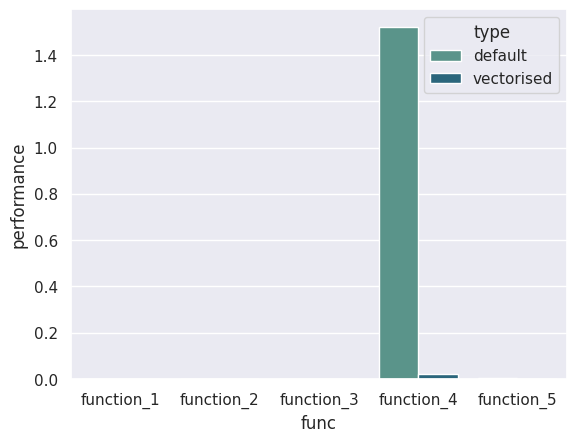

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

sns.barplot(data = times, x = 'func', y = 'performance', hue = 'type', palette = 'crest')

plt.show()

**Выводы**: Нифига себе (график все говорит за себя). Ну а вообще, время практически не отличается, если решение линейное. а если куб, как в 4-ой, то с numpy гораздо быстрее.

---

